In [1]:
# warning msg remore
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kidney-disease_pre-processed.csv')
df.head()

,Unnamed: 0,id,age,bp,sg,al,su,bgr,bu,sc,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,...,1,0,0,1,1,0,0,0,0,0
1,1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,...,1,0,0,0,0,0,0,0,0,0
2,2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,...,1,0,0,0,1,0,1,0,1,0
3,3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,...,0,1,0,1,0,0,1,1,1,0
4,4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

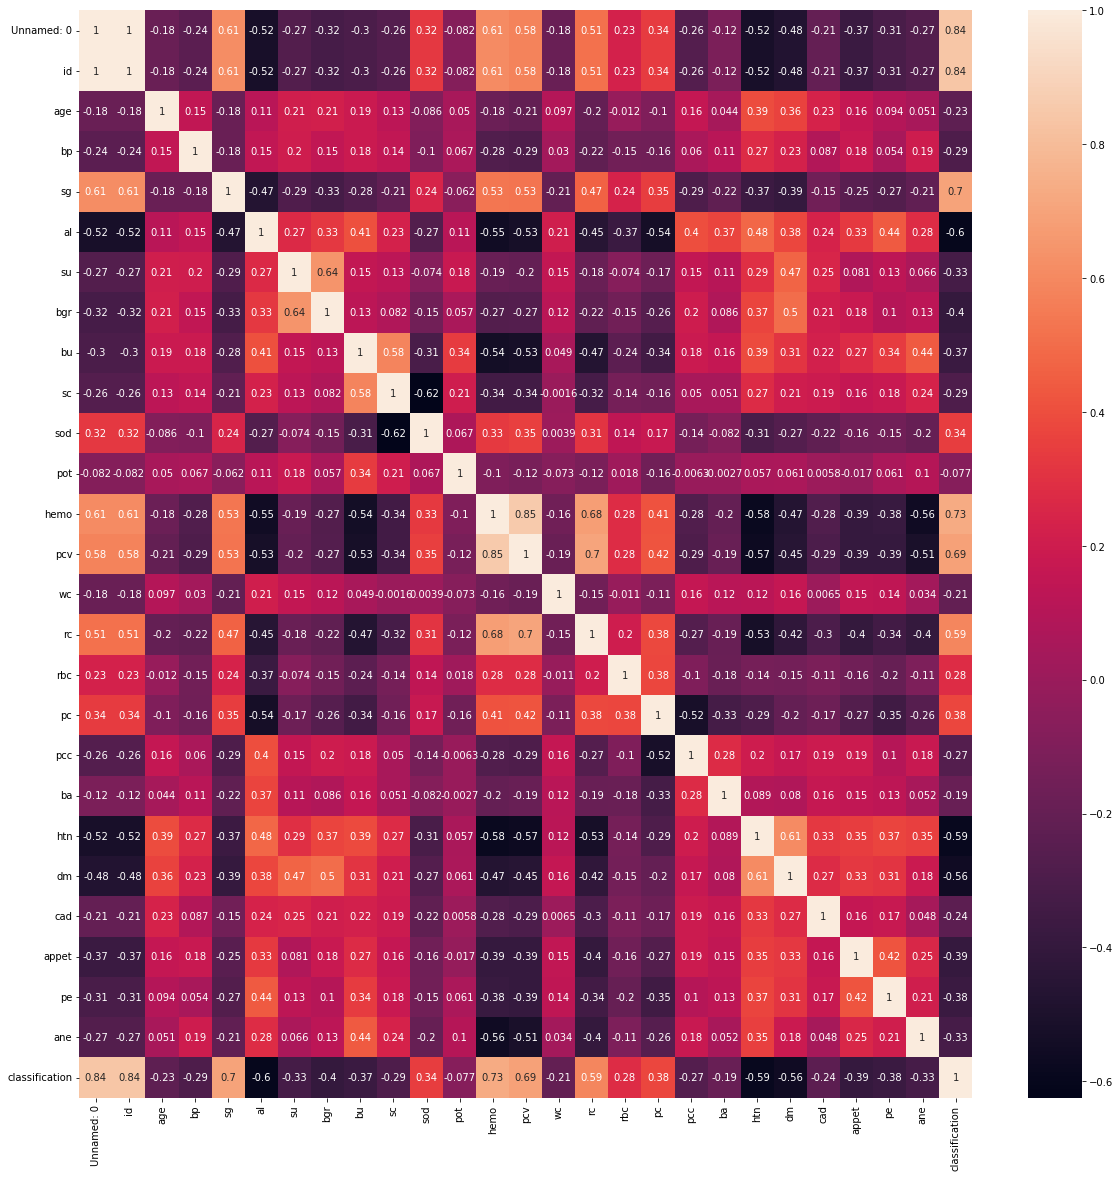

In [4]:
# Finding Correlation
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [4]:
# Seperate independent and dependent variables

x = df.drop(['Unnamed: 0','id', 'classification'], axis=1)
y = df['classification']
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,...,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,...,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,...,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,...,1,1,0,0,0,0,0,0,0,0


In [5]:
# Detect the Label Balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [6]:
# Balance the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [8]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=10)
# kf

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [10]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x,y,cv=10)

array([0.975, 0.975, 0.975, 0.975, 0.925, 0.975, 0.975, 1.   , 1.   ,
       1.   ])

In [11]:
cross_val_score(SVC(gamma='auto'), x,y,cv=10)

array([0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625,
       0.625])

In [12]:
cross_val_score(RandomForestClassifier(n_estimators=40),x,y,cv=10)

array([1.   , 0.975, 1.   , 1.   , 0.95 , 1.   , 1.   , 0.975, 1.   ,
       1.   ])

#Parameter tuning

In [13]:
s1 = cross_val_score(RandomForestClassifier(n_estimators=10),x,y,cv=10)
np.average(s1)

0.985

In [14]:
s2 = cross_val_score(RandomForestClassifier(n_estimators=20),x,y,cv=10)
np.average(s2)

0.9875

In [15]:
s3 = cross_val_score(RandomForestClassifier(n_estimators=30),x,y,cv=10)
np.average(s3)

0.99

In [16]:
import pickle
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(x,y)
with open('ckd.pickle','wb') as f:
    pickle.dump(random_forest,f)

In [17]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))